# Sklearn
1. A very popular python ML library
2. Has numerous utility features to assist on all steps of the analysis pipeline
3. In production you want XGBoost/TensorFlow/theano (see tomorrow)

### Load the data

In [1]:
import numpy as np
data = np.load('data/data.npz')
X, y = data["X"], data["y"]
print(X.shape, y.shape)

(4505, 2) (4505,)


### Create train/test split

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.5, random_state=1337)

### Plot the full dataset

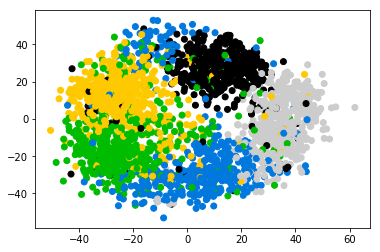

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap='nipy_spectral');

# Train a decision tree

Scikit-learn Decision Tree classifier has a few notable parameters

* criterion : 'gini' or 'entropy', used to select best split (default gini).
* max_depth :  The maximum depth of the tree. (default unlimited).
* min_samples_split : The minimum number of samples required to split an internal node (default 2).
* min_samples_leaf : The minimum number of samples required to be at a leaf node (default 1).

For now, all of them are at their default values, but we shall need them soon.

In [4]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

One of the few advantages of the decision tree is its interpretability

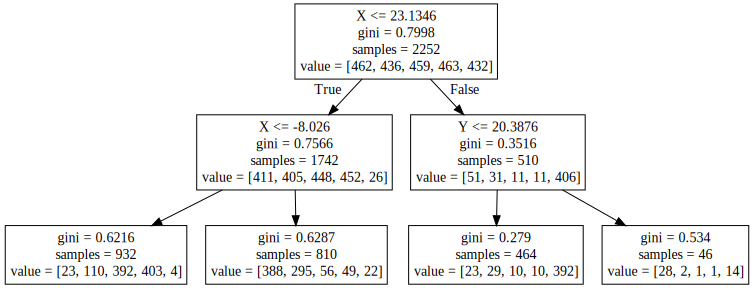

In [67]:
# https://stackoverflow.com/questions/33086752/display-decision-tree-in-ipython-notebook
from IPython.display import SVG, display
import io
import pydot
from scipy import misc

def show_tree(decisionTree, feature_names=None, class_names=None):
    dotfile = io.StringIO()
    export_graphviz(decisionTree, out_file=dotfile, feature_names=feature_names, class_names=class_names)
    graph = pydot.graph_from_dot_data(dotfile.getvalue())[0] 
    display(SVG(graph.create_svg()))
shallow_tree = DecisionTreeClassifier(max_depth=2).fit(X_train, Y_train)
show_tree(shallow_tree, ["X", "Y"])

### Display decision boundaries

In [83]:
from sklearn.metrics import accuracy_score
def plot_decision_surface(clf, X, y,
                          plot_step = 0.2,
                          cmap='nipy_spectral',
                          figsize=(12,8)
                         ):
    """
    For a sklearn-compartiable classifier plots the decision surface along with some
    points.
    Args:
       clf - a sklearn-compartiable classifier
       X - features array, shape=(n_objects, n_features)
       y - labels array, shape=(n_objcts)
       plot_strp - decision surface grid step
       cmap - color map
       figsize - figure size"""
    fig, ax = plt.subplots(figsize=figsize)
    n_classes = len(clf.classes_)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=cmap,alpha=0.5)    
    y_pred = clf.predict(X)

    ax.scatter(*X[y_pred==y].T, c=y[y_pred==y],
                marker='.',cmap=cmap,alpha=0.5,label='correct')
    ax.scatter(*X[y_pred!=y].T, c=y[y_pred!=y],
                marker='x', cmap=cmap, s=50, label='errors')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    #plt.axis("tight")
    ax.legend(loc='best')
    print("Accuracy = %f" % accuracy_score(y, y_pred))

### Training performance

Accuracy = 1.000000


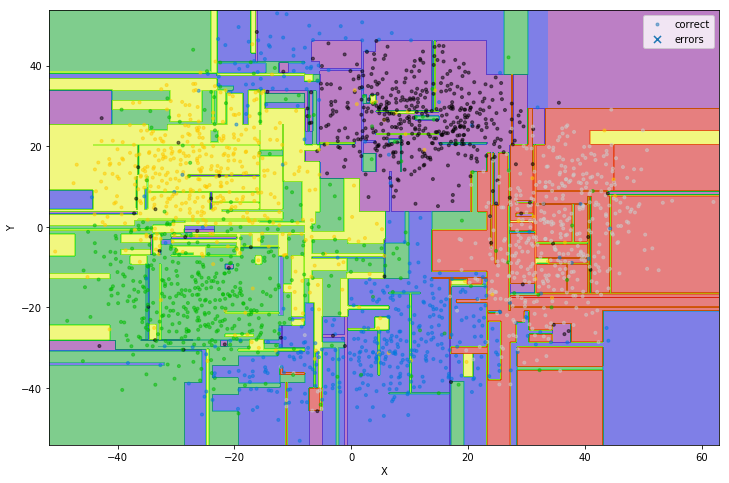

In [84]:
plot_decision_surface(tree, X_train, Y_train);

### Validation performance

Accuracy = 0.707501


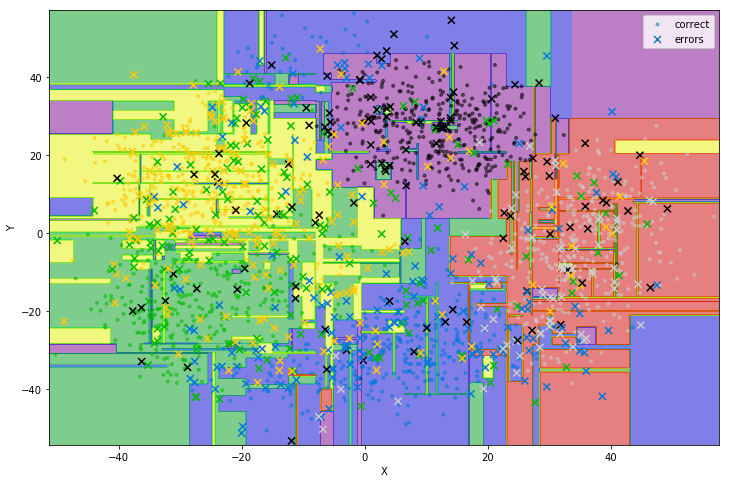

In [85]:
plot_decision_surface(tree, X_test, Y_test);

# Linear models

In [95]:
from sklearn.linear_model import LogisticRegression

Accuracy = 0.775854


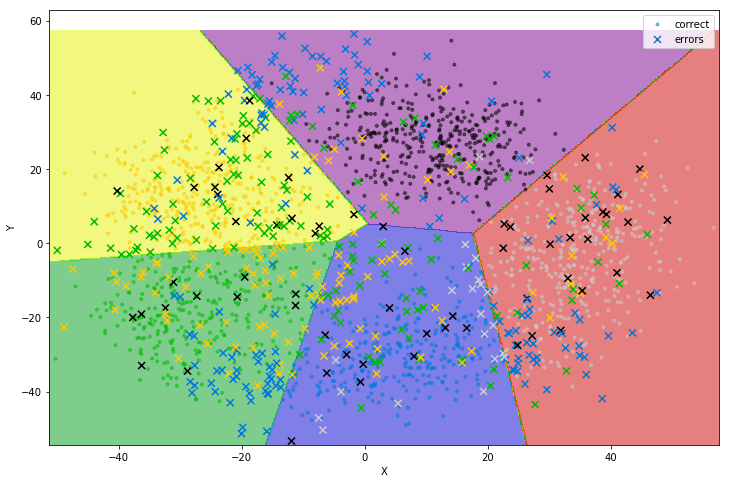

In [253]:
plot_decision_surface(LogisticRegression(C=1.).fit(X_train, Y_train), X_test, Y_test)

Accuracy = 0.758988


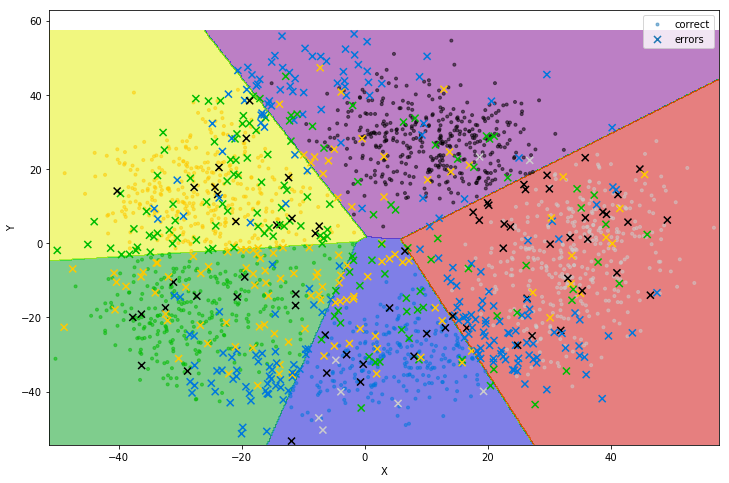

In [255]:
plot_decision_surface(LogisticRegression(C=1e-2).fit(X_train, Y_train), X_test, Y_test)

Accuracy = 0.777186


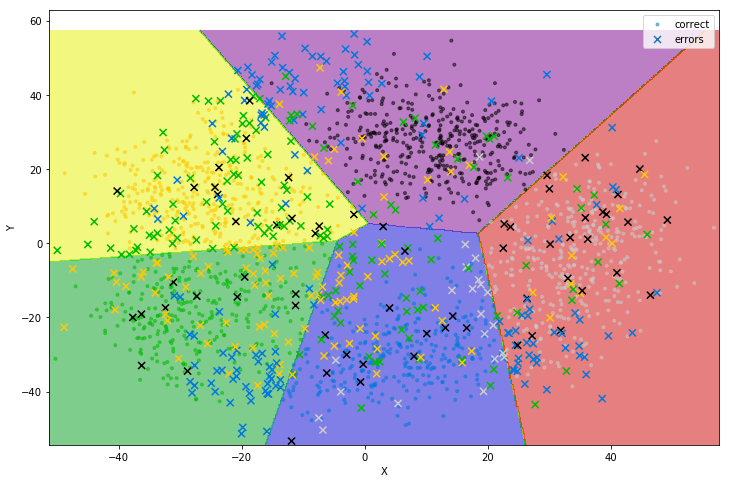

In [266]:
plot_decision_surface(LogisticRegression(C=1e3).fit(X_train, Y_train), X_test, Y_test)

Bagging ensembles

In [274]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

Accuracy = 0.770084


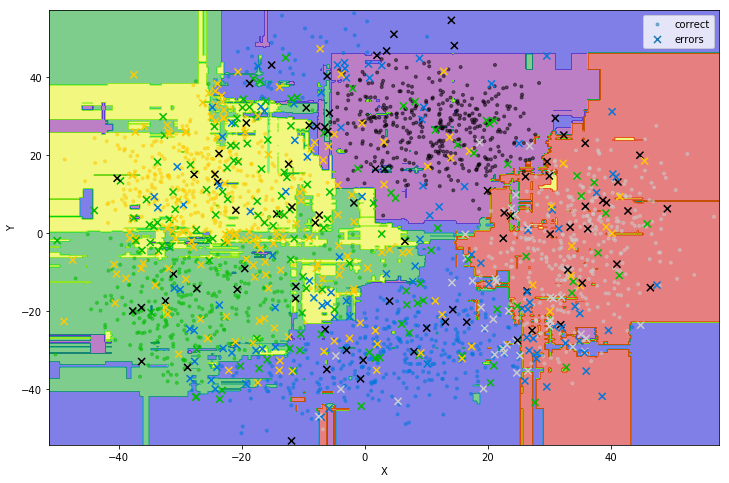

In [276]:
plot_decision_surface(RandomForestClassifier(n_jobs=-1).fit(X_train, Y_train), X_test, Y_test)

# Quality metrics
Too many of them, select according to your task. For binary classification the most common is ROC AUC.

In [114]:
Y_train_binary = (Y_train > 0)
Y_test_binary = (Y_test > 0)
binary_tree = DecisionTreeClassifier().fit(X_train, Y_train_binary)

In [116]:
import sklearn.metrics

In [122]:
# Pay attention we use predict_proba(), not the simple predict()
# Also pay attention that predict_proba return shape in (n_obejcts, n_classes)
sklearn.metrics.roc_auc_score(Y_test_binary, binary_tree.predict_proba(X_test)[:, 1])

0.86061709388982421

In [124]:
sklearn.metrics.accuracy_score(Y_test_binary, binary_tree.predict_proba(X_test)[:, 1])

0.91478029294274299

In [127]:
# Will fail
# sklearn.metrics.accuracy_score(Y_test, tree.predict_proba(X_test))

In [128]:
sklearn.metrics.accuracy_score(Y_test, tree.predict(X_test))

0.70750110963160229

# Cross-validation

In [129]:
from sklearn.model_selection import cross_val_score

In [135]:
# Will fail
# cross_val_score(DecisionTreeClassifier(), X, y, scoring="roc_auc")

In [138]:
cross_val_score(DecisionTreeClassifier(), X, y, scoring="accuracy", n_jobs=-1, cv=10)

array([ 0.66814159,  0.69911504,  0.72062084,  0.74279379,  0.72283814,
        0.71396896,  0.67627494,  0.73555556,  0.72098214,  0.70758929])

# Exercises
## One
The tree has clearly overfitted - train performance is much better than test. Plot train accuracy and test accuracy as a function of maximum tree depth

In [90]:
# <your code goes here>

## Two
The result is still too bad for MLHEP! Your quest is to fix this issue by tweaking decision tree hyperparameters using the cross-validation score as the guide. A few most helpful ones are provided above the DecisionTreeClassifier definition.
 * Accuracy >= 0.72 is a start, but you can do better
 * Accuracy >= 0.75 is better, but still improvable
 * Accuracy >= 0.78 is a reasonably good result
 * Accuracy >= 0.8 is either epic skill or luck. Be sure to tell us if you got it!

In [268]:
# <your code goes here>

## Three
Use the best parameters you found for a single tree in a RandomForest classifier. Plot it's cross-validation performance as the number of trees used. Plot the untuned RandomForest performance as the function of the number of trees used.

In [269]:
# <your code goes here>

## Four
How good is your numpy and Python? Can you implement a sklearn-compartiable linear regression class? Need methods:
```
fit(X, y)
Args:
X: a numpy array shape=(n_objects, n_features)
y: a numpy array shape=(n_objects)

Returns self

predict(X)
Args:
X: a numpy array shape=(n_objects, n_features)

Returns a numpy array shape=(n_objects)
```
Compare its performance to the Ridge regression from sklearn. Bonus points for regularization support.

In [141]:
import sklearn.datasets

In [261]:
x_linear, y_linear = sklearn.datasets.make_regression(
        n_samples=int(1e4), n_features=5, n_informative=4, random_state=42, noise=5)

In [271]:
x_linear_train, x_linear_test, y_linear_train, y_linear_test = train_test_split(x_linear, y_linear, train_size=50,
                                                                                random_state=124)

In [272]:
from sklearn.linear_model import Ridge

In [273]:
sklearn.metrics.mean_squared_error(y_linear_test,
                                   Ridge().fit(x_linear_train, y_linear_train).predict(x_linear_test))

46.713325462155495

In [283]:
# <your code goes here>

## Five
Why does BaggingClassifier not improve the linear regression quality?

Accuracy = 0.776742


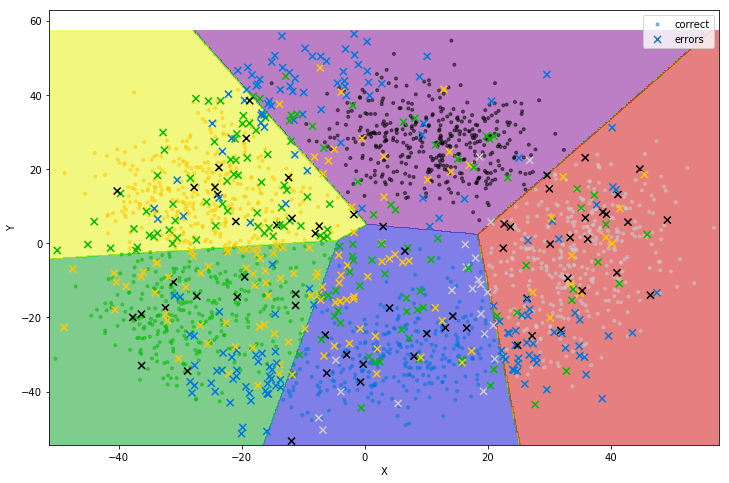

In [282]:
plot_decision_surface(BaggingClassifier(
    base_estimator=LogisticRegression(C=1e3), n_jobs=-1).fit(X_train, Y_train), X_test, Y_test)